# Programming Assignment 2: InstaCart Orders [Total: 15 pts]
**Note**: This assignemnt will be graded manually.

## Research question

**Do people order different foods at different times of day?**

For example, do people order more junk food relative to
other foods late at night?

## Technical skills

- Explore the data using Pandas (aggregation, merging, data wrangling);
- Visualize the data to help address the main research question;
- Tell a compelling story by presenting results in a Jupyter notebook using MarkDown (see this [MarkDown tutorial](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/) for help).

## Description

Instacart is a grocery store delivery service. People place orders online, requested products are gathered at the grocery store, and delivered to the person's location, sometimes within an hour. Instacart made data for several million of these orders publicly available on their website. To keep things more manageable, we have created a smaller dataset that includes information about 1% or all orders from the original dataset. (See the ***Data Dictionary*** section below for more information about the files included in this assignment.)

Your job is to explore the data with the goal of constructing 3 visualizations that address the following research question:

    RQ. Do people order different foods at different times of day?

There are a few reasons we might expect orders to be different for different times of day. First, some orders may be impulse purchases in which a person makes an order for things they want right away (e.g. frozen pizza late at night). Second, if a person is ordering groceries at a particular time of day, then some products may come to their mind more easily (it is easy to think about coffee in the morning, for example). Third, and related to the previous point, a person may decide to place an order because they ran out of a product they typically use at that time of the day (e.g. milk in the morning).

Note that you can base your analysis either on individual **departments** (e.g. snacks vs produce), **aisles** within the departments (e.g. specialty cheeses vs dry goods), or **products** (e.g. Artisan Baguette vs Feta cheese). There are multiple different ways to visualize the data: the choice is up to you. You know you have done a good job if you can interpret your own visualizations. My approach is to start with departments: I typically build bar graphs that display the number the orders on the $y$ axis vs the hour of day on the $x$ axis for each department  and look for any clear trend. If a particular department I'm interested in does not show any particular trend, I may look for specific aisles within the department, or even track down orders of individual products, though keep in mind that there may not be enough data to see a meaningful trend.

## What to submit

<div class="alert alert-info">There is no autograder in this notebook. However, your visualizations need to be reproducible for us to grade them. So make sure to do <i>Kernel &rarr; Restart &amp; Run All</i> before submitting to ensure that your code works.</div>

You will work entirely in this notebook and submit it on Gradescope as usual. You should produce in this notebook __3 visualizations__ that answer the research question above.

Each visualization should be *limited to a single product/aisle/department.* You may choose whatever 3 products/aisles/departments you like. For example, you could pick 3 different departments; or 2 departments and 1 aisle; or 1 department, 1 aisle, and 1 product.

Each visualization should include at least the following elements:
1. Clear __axis labels__ on both the $x$ and $y$ axis;
2. A figure __title__;
3. A brief (3 to 4 sentences max) __description of the plot__ in a separate cell underneath the plot cell.

Finally, in the last cell of the notebook, you should write a short __summary of findings__ describing what you found across the 3 visualizations, why it matters, and to whom: your findings could be helpful for different __stakeholders__ &mdash; grocery store owners, shoppers, the Instacart company itself, etc. Make sure to identify in your summary who may benefit from knowledge of your findings. _The summary should be at least 150 words long._


## Grading rubric

* Each visualization is worth **4 points**, with these possible penalties:
  - Up to &minus;1 pt penalty for missing / uninformative axis label (note this applies to each axis separately, so this is max &minus;2 pts).
  - Up to &minus;1 pt penalty for missing / uninformative title.
  - Up to &minus;1 pt penalty for missing / too short / uninformative plot description.
* The final summary is worth **3 points**, with these possible penalties:
  - Up to &minus;1 pt penalty for not meeting the minimum length (&ge;150 words);
  - Up to &minus;1 pt penalty for not summarizing findings of _all three_ plots;
  - Up to &minus;1 pt penatly for not identifying relevant stakeholders.

## Data Dictionary

### File `orders_sample.csv`

Each row in this table represents an order made by a particular customer. An order may contain multiple products.
- `order_id` &ndash; Unique order identifier;
- `user_id` &ndash; Unique user identifier;
- `order_dow` &ndash; Day of week of the order (`0` &ndash; Monday &#8230; `6` &ndash; Sunday);
- `order_hour_of_day` &ndash; Hour of the day the order was placed.

### File `products.csv`

Each row in this table represents a product in the store's inventory.
- `product_id` &ndash; Product ID (unique identifier for each product);
- `product_name` &ndash; Product name;
- `aisle_id` &ndash; Aisle ID (unique identifier for each aisle);
- `department_id` &ndash; Department ID (unique identifier for each department).

### File `order_products_sample.csv`

Each row in this table contains information about a particular product that is part of an order.
- `order_id` &ndash; Unique order identifier;
- `product_id` &ndash; Product ID (Unique identifier for each product).

### File `departments.csv`

Each row in this table contains information about a particular department.
- `department_id` &ndash; Unique department identifier;
- `department` &ndash; Department description.

### File `aisle.csv`

Each row in this table contains information about a particular aisle.

- `aisle_id` &ndash; Aisle ID (unique identifier for each aisle);
- `aisle` &ndash; Aisle name.

### → First, I have to import the data and merge the tables together before making the visualizations

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

aisles = pd.read_csv('aisles.txt')
departments = pd.read_csv('departments.txt')
order_products_sample = pd.read_csv('order_products_sample.txt')
orders_sample = pd.read_csv('orders_sample.txt')
products = pd.read_csv('products.txt')

In [ ]:
# Merge orders_sample and order_products_sample
orders_products_merged = pd.merge(orders_sample, order_products_sample, on='order_id')

# Merge the previous result with products to get the department_id
orders_products_dept_merged = pd.merge(orders_products_merged, products, on='product_id')

# Merge the previous result with departments to get more department information
data = pd.merge(orders_products_dept_merged, departments, on='department_id')

# All datasets merged together 
data.head(5)

---

## Viz1

Work in the code cell and the markdown cell below.

### Viz1: Code cell

**Points:** 3

Use the code cell below to produce your plot. Refer to the **grading rubric** for what to include in it. You may add extra cells if you like but please do not delete / duplicate that cell. Running your cell should display a plot.

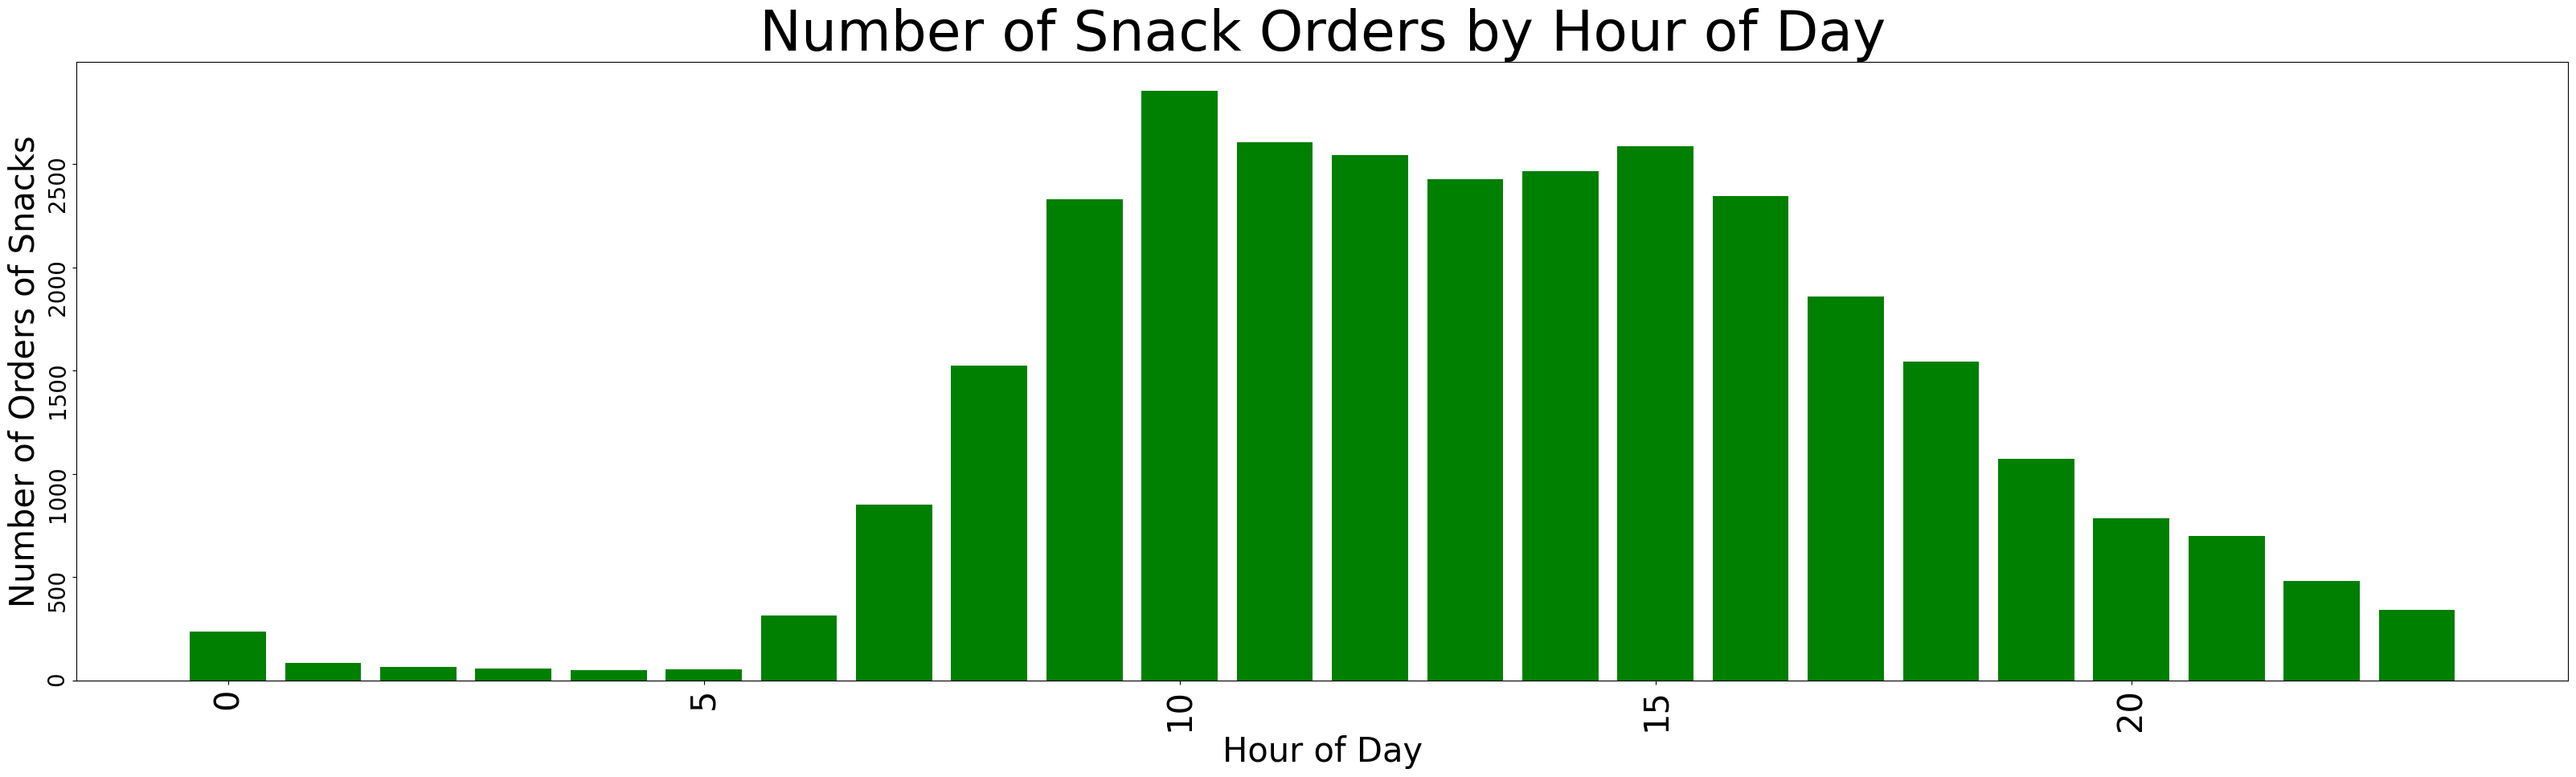

In [10]:
%matplotlib inline

### BEGIN SOLUTION

snacks = data[data['department'] == 'snacks'].groupby('order_hour_of_day').size()

plt.figure(figsize=(40,10))
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=90,fontsize=20)
plt.bar(snacks.index, snacks.values, color='green')

plt.xlabel('Hour of Day', fontsize=30)
plt.ylabel('Number of Orders of Snacks', fontsize=30)
plt.title('Number of Snack Orders by Hour of Day', fontsize=50)

plt.show()
### END SOLUTION

### Viz1: MarkDown cell

**Points**: 1

Use the markdown cell below to describe your plot. Refer to the **grading rubric** for what to include in it.


`This bar chart shows the number of snack orders placed at different hours of the day. The x-axis represents the hours of the day from 0 to 23 and the y-axis represents the total number of snacks. During the middle of the day there are more snack orders compared to the morning and night time.`

---

## Viz2

Work in the code cell and the markdown cell below.

### Viz2: Code cell

**Points:** 3

Use the code cell below to produce your plot. Refer to the **grading rubric** for what to include in it. You may add extra cells if you like but please do not delete / duplicate that cell. Running your cell should display a plot.

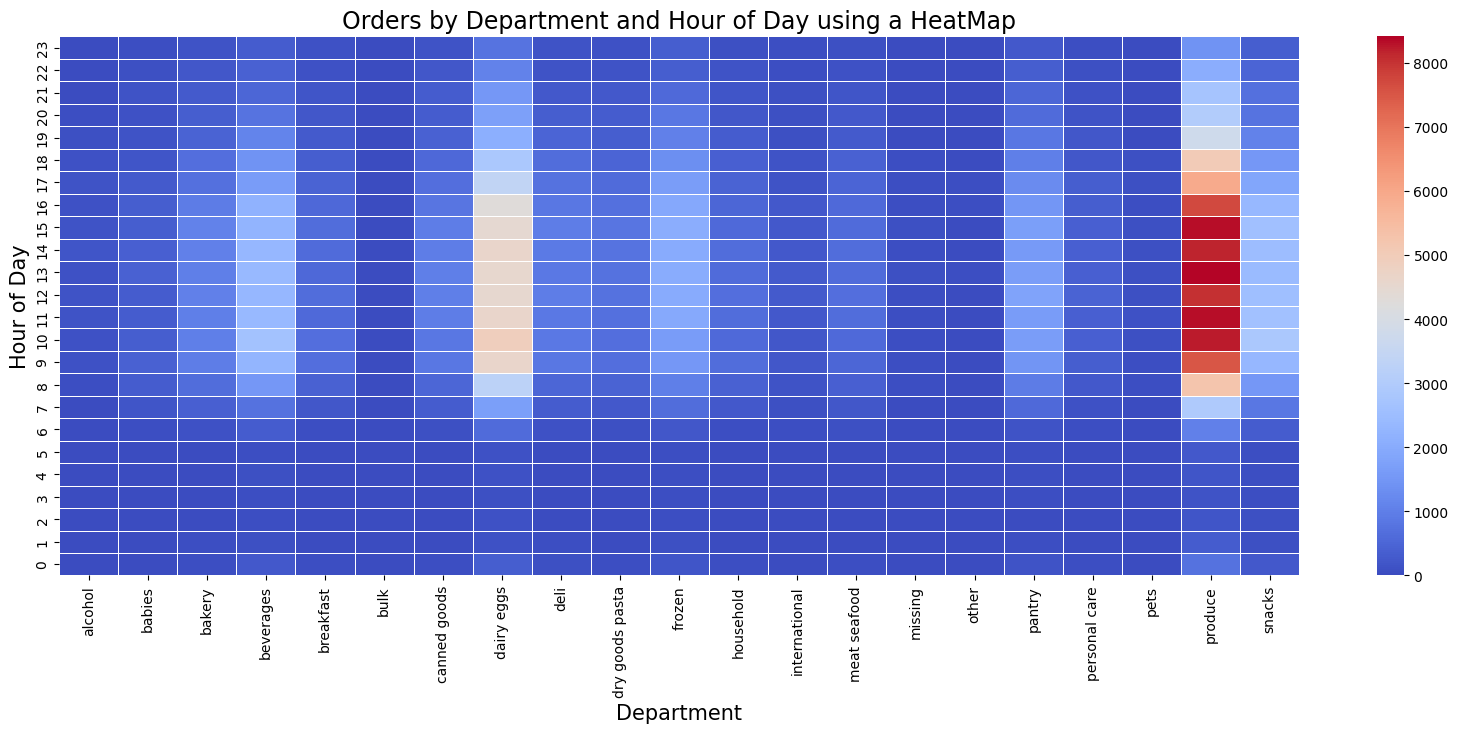

In [25]:
%matplotlib inline

### BEGIN SOLUTION
import seaborn as sns

heatmap = data.groupby(['order_hour_of_day', 'department']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 7))
sns.heatmap(heatmap, cmap='coolwarm', linewidths=0.5)
plt.title('Orders by Department and Hour of Day using a HeatMap', fontsize=17)
plt.xlabel('Department', fontsize=15)
plt.ylabel('Hour of Day', fontsize=15)
plt.gca().invert_yaxis()
plt.show()
### END SOLUTION

### Viz2: MarkDown cell

**Points**: 1

Use the markdown cell below to describe your plot. Refer to the **grading rubric** for what to include in it.

`This heatmap illustrates the distribution across different departments and hours of the day. The x-axis represents the different departments and the y-axis represents the hours of the day from 0 to 23. The color intensity ranges from cool (low & blue) to warm (high & red), indicating the number of orders placed. Darker shades of red shows higher concentrations of orders for that department at a specific hour while blue represents a lower number of orders for a department.`


---

## Viz3

Work in the code cell and the markdown cell below.

### Viz3: Code cell

**Points:** 3

Use the code cell below to produce your plot. Refer to the **grading rubric** for what to include in it. You may add extra cells if you like but please do not delete / duplicate that cell. Running your cell should display a plot.

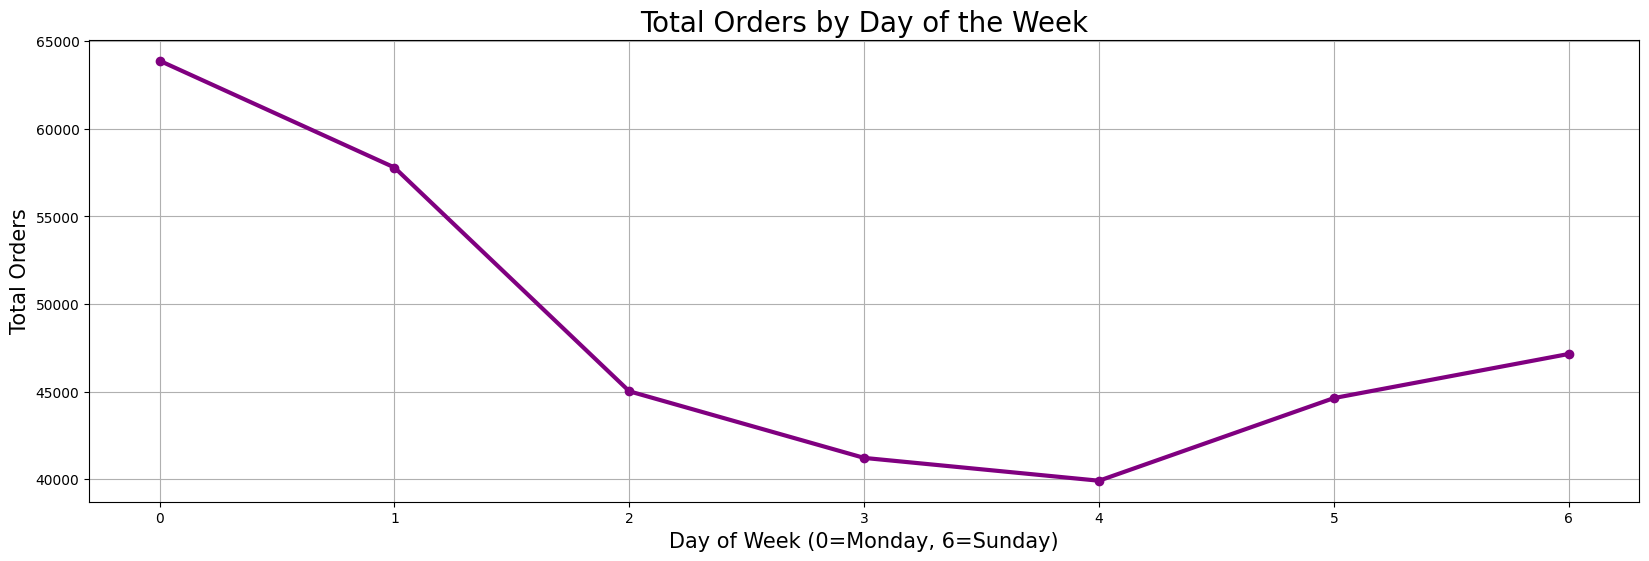

In [44]:
%matplotlib inline

### BEGIN SOLUTION

total_orders_by_days = data.groupby('order_dow').size()
total_orders_by_days.plot(kind='line', marker='o', color='purple', linewidth=3, figsize=(20, 6))
plt.title('Total Orders by Days of the Week', fontsize=20)
plt.xlabel('Days of Week (0=Monday, 6=Sunday)',  fontsize=15)
plt.ylabel('Total Orders', fontsize=15)
plt.grid(True)

plt.show()
### END SOLUTION

### Viz3: MarkDown cell

**Points**: 1

Use the markdown cell below to describe your plot. Refer to the **grading rubric** for what to include in it.

`This line graph shows the total number of orders placed on each day of the week. The x-axis represents the days (0= Monday...6=Sunday) and the y-axis represents the total number of orders. This line plot helps visualize trends across the week and how orders change by day.`

---

# Summary

Use the markdown cell below to summarize your findings. Refer to the **grading rubric** for what to include in it.

`The bar chart visualization shows snack orders for each hour of the day. The data shows that snack orders are not as popular in the early morning but peak in the late morning and afternoon and then decline at night. Shoppers get a lot of snacks from 7 am to 4 pm.`

`The heatmap visualization shows popularized departments throughout a single day. This data shows the produce department is very popular amongst consumers compared to any other department in a single day. From 9am - 4pm there are near 8000 orders of produces. The second most popular department is dairy eggs, where people order around 5000 dairy eggs from 9am to 4pm.`

`The line graph visualization shows the total number of orders placed each day of the week. There are about 63,000 orders on Monday which is the highest amount of orders in one day out of the whole week. Friday has the lowest number of orders, which is 40,000. At the beginning of the graph the orders are really high then the number of orders decreases every day but when it gets to Saturday the orders increase again.`

`These findings will help several stakeholders, for example, grocery store owners, instacart, and shoppers. Grocery store owners can understand the different peaks of snack ordering time, popularized departments, and the number of orders placed each day for one week, which can help them with inventory so they can be well stocked. Instacart can use this data to optimize delivery time during peak hours. Instacart can ensure that there will be more delivery drivers during certain times of the day and days of the week because of the influx of orders. Shoppers can understand this data when they want to buy different foods, looking at the time of day and what day of the week.`